In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

hours = np.arange(0.5, 6, 0.5)
outcome = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
data = pd.DataFrame.from_records(zip(hours, outcome), columns=['hours', 'outcome'])

In [15]:
X = data["hours"]
y=data["outcome"]

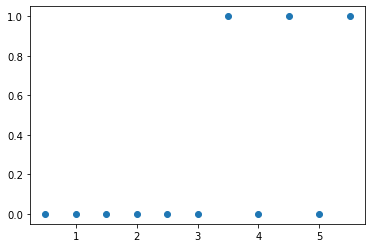

In [16]:
plt.scatter(X,y)

In [30]:
print(X.shape, y.shape)
X_reshaped = X.values.reshape(-1, 1)
y_reshaped = y.values.reshape(-1, 1)
print(X_reshaped.shape, y_reshaped.shape)

(11,) (11,)
(11, 1) (11, 1)


In [31]:
model = LogisticRegression(random_state=0, #ovr is for binary problem
                           solver="lbfgs",
                           multi_class="ovr")

In [32]:
model.fit(X_reshaped, y_reshaped)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(multi_class='ovr', random_state=0)

In [34]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [35]:
model.predict_proba([[3]])

array([[0.79375149, 0.20624851]])

In [36]:
model.predict_proba([[20]])

array([[2.35290847e-06, 9.99997647e-01]])

In [37]:
model.predict_proba([[5.0]])

array([[0.41689037, 0.58310963]])

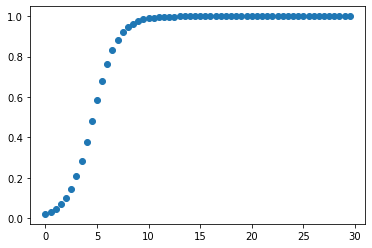

In [39]:
hours = np.arange(0,30,0.5)
probabilities = []
for h in hours:
    p_fail, p_pass = model.predict_proba([[h]])[0]
    probabilities.append(p_pass)

plt.scatter(hours, probabilities)